In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
df = pd.read_excel(r'/Users/firatsoydinc/Desktop/Miuul/Week - 3 /Ders Sonrasi Notlar ve Odevler /Ders Sonrası Notlar/online_retail_II.xlsx',sheet_name='Year 2010-2011')


In [3]:
# Data set has 541910 data, so data reading process takes time. Copy process is using for timesaving for later usage.
df_new = df.copy()
df_new


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
def overview_df(dataframe):
    print("##################### Types of Variables#####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

overview_df(df_new)

##################### Types of Variables#####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### NA #####################
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


Description and Customer ID columns has missing values. I choose to drop this observation from dataset.

In [5]:
df_new= df_new.dropna()
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
def grab_cols(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols, num_but_cat

cat_cols, cat_but_car, num_cols, num_but_cat = grab_cols(df_new)

Observations: 406830
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [7]:
cat_cols = ['Invoice','StockCode','Description','Country']
for cols in cat_cols:
    print(cols,df_new[cols].nunique())

Invoice 22190
StockCode 3684
Description 3896
Country 37


Data set has 8 variables, and 4 of this variables are numeric,and the rest is categoric. However, categoric variables have high cardinality.

count    406830.000000
mean         12.061276
std         248.693065
min      -80995.000000
5%            1.000000
10%           1.000000
20%           1.000000
30%           2.000000
40%           3.000000
50%           5.000000
60%           6.000000
70%          12.000000
80%          12.000000
90%          24.000000
95%          36.000000
99%         120.000000
max       80995.000000
Name: Quantity, dtype: float64


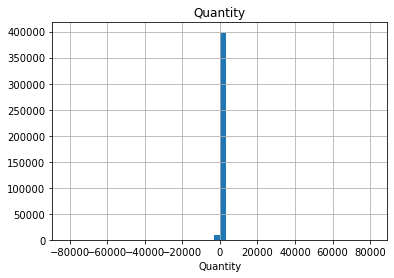

##############Quantiles#######################
count                  406830
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object


/var/folders/3f/gc8gr09d6_d93ry_6xqzw3sh0000gn/T/ipykernel_40533/70270717.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataframe[numerical_col].describe(quantiles).T)


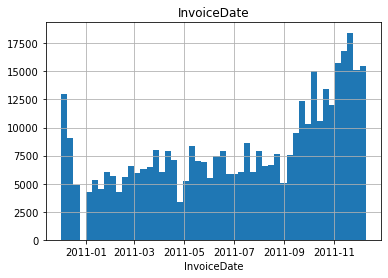

##############Quantiles#######################
count    406830.000000
mean          3.460507
std          69.315080
min           0.000000
5%            0.420000
10%           0.550000
20%           0.850000
30%           1.250000
40%           1.650000
50%           1.950000
60%           2.100000
70%           2.950000
80%           4.150000
90%           6.750000
95%           8.500000
99%          15.000000
max       38970.000000
Name: Price, dtype: float64


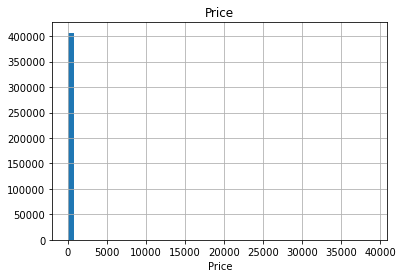

##############Quantiles#######################
count    406830.000000
mean      15287.684160
std        1713.603074
min       12346.000000
5%        12626.000000
10%       12876.000000
20%       13536.000000
30%       14159.000000
40%       14659.000000
50%       15152.000000
60%       15805.000000
70%       16493.000000
80%       17095.000000
90%       17719.000000
95%       17905.000000
99%       18212.000000
max       18287.000000
Name: Customer ID, dtype: float64


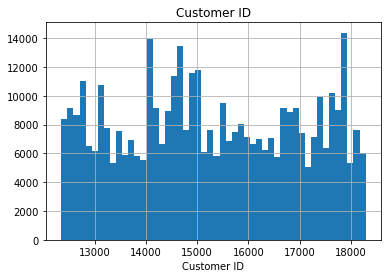

##############Quantiles#######################


In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("##############Quantiles#######################")


for col in num_cols:
    num_summary(df_new, col,plot=True)

##### Quantity and Price variables have negative variables and this variables cannot be negative. 


##### Invoice date variables are between; 
   
            .first     2010-12-01 08:26:00
            .last      2011-12-09 12:50:00
           

        

In [9]:
#Negative values are due to return invoices. Two approaches can be applied to eliminate these values.
#Only return invoices can be extracted from the data set.
#Both receipt and return data can be extracted from the dataset.

df_new=df_new[~df_new['Invoice'].str.contains('C',na=False)]


#### Calculating RFM Metrics 

The last number of days that the customer was active is calculated by adding 2 more day to the largest observation date in the data set. (The reason for adding 2 day is not getting a negative value because of the hour.)

In [10]:
df_new['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
# To calculate how much money spend in one order
df_new['TotalPrice']=df_new['Price']*df_new['Quantity']


/var/folders/3f/gc8gr09d6_d93ry_6xqzw3sh0000gn/T/ipykernel_40533/670123029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TotalPrice']=df_new['Price']*df_new['Quantity']


In [12]:
today_date = dt.datetime(2011, 12, 11)

rfm = df_new.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})


In [13]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [14]:
#Renameing columns
rfm.columns = ['recency', 'frequency', 'monetary']

rfm=rfm[rfm['monetary']>0]

In [15]:
#Recency shows the last shopping day by customer. Smallest recency is better, so 5 is given to smallest score.
rfm['recency_score']=pd.qcut(rfm['recency'],5,labels=[5,4,3,2,1])

# Frequency shows shopping frequency of the customer. Biggest frequency is better, so 5 is given to smallest score.
rfm['frequency_score']=pd.qcut(rfm['frequency'].rank(method='first'),5,labels=[1,2,3,4,5])

# Monetary shows totol money spending by customer. Biggest monetary is better, so 5 is given to smallest score.
rfm['monetary_score']=pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5])

# Calculating the RFM Score: Combining the Recency, and Frequency score as a str. Also, monetary ignoring 
#while calculating the RFM.
rfm['RFM_SCORE']=rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str)

## Best RFM score is: 55 
## Worst RFM score is 11


In [16]:
#Depending on the RFM score, customers are labeled with the regex code below.
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.

Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.

New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.

At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

Can’t Lose Them are customers who used to visit and purchase quite often, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

#### Advice based on RMF Labels

In [20]:
## Remarketing studies should be done within these three groups. For these people, they can be 
#included in the system again with extra promotions or discounts, or brand reminders can be made via e-mail and sms.

rfm_cols = ['hibernating','at_risk','cant_loose']

for cols in rfm_cols:
    print(rfm[rfm['segment']==cols])


             recency  frequency  monetary recency_score frequency_score  \
Customer ID                                                               
12346.0          326          1  77183.60             1               1   
12350.0          311          1    334.40             1               1   
12353.0          205          1     89.00             1               1   
12354.0          233          1   1079.40             1               1   
12355.0          215          1    459.40             1               1   
...              ...        ...       ...           ...             ...   
18268.0          135          1     25.50             2               2   
18269.0          367          1    168.60             1               2   
18278.0           74          1    173.90             2               2   
18280.0          278          1    180.60             1               2   
18281.0          181          1     80.82             1               2   

            monetary_sco

In [21]:
## People in these groups are regular shoppers who already know the brand well, and these people can be 
#rewarded by giving them small promotions (free shipping coupons or priorities in the customer contact centre).
#In this way, they can feel valuable and we prevent them from going to another brand.

rfm_cols = ['champions','potential_loyalists']

for cols in rfm_cols:
    print(rfm[rfm['segment']==cols])


             recency  frequency  monetary recency_score frequency_score  \
Customer ID                                                               
12347.0            3          7   4310.00             5               5   
12362.0            4         10   5226.23             5               5   
12364.0            8          4   1313.10             5               4   
12381.0            5          5   1845.31             5               4   
12417.0            4          9   3649.10             5               5   
...              ...        ...       ...           ...             ...   
18241.0           10         17   2073.09             5               5   
18245.0            8          7   2567.06             5               5   
18272.0            3          6   3078.58             5               5   
18273.0            3          3    204.00             5               4   
18283.0            4         16   2094.88             5               5   

            monetary_sco

In [22]:
#We can apply an upsell strategy to a new customer group to order again. Some advantages can be provided for 
#both of the actions taken in the above two groups to increase customer satisfaction in this segment and to 
#keep them in the system.

print(rfm[rfm['segment']=='new_customers'])

             recency  frequency  monetary recency_score frequency_score  \
Customer ID                                                               
12367.0            5          1    168.90             5               1   
12442.0            4          1    172.06             5               1   
12478.0            4          1    680.99             5               1   
12479.0           12          1    527.20             5               1   
12558.0            8          1    269.96             5               1   
12587.0            8          1    144.00             5               1   
12650.0            4          1    314.44             5               1   
12660.0           12          1    245.10             5               1   
12713.0            1          1    848.55             5               1   
12953.0           10          1    329.85             5               1   
12966.0           10          1    160.18             5               1   
13017.0            8     